In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pyslabgrid.circ as circ
import pyslabgrid.slabrup as slabrup
from scipy.interpolate import interp1d
from scipy.interpolate import PPoly
import statsmodels.api as sm
import pylab

In [2]:
dump_hik = slabrup.get_GeoNetevents('hik')
dump_puy = slabrup.get_GeoNetevents('puy')
slabevents = {'hik': dump_hik, 'puy': dump_puy}

In [3]:
# this remains the same!
critical_dip = {'hik': 45, 'puy': 0}
# trnsition dip for strike-chnage
# process_strikediprake(slabevents, szone, critical_dip=None):
dump_hik = slabrup.process_strikediprake(slabevents, 'hik', critical_dip=critical_dip)
dump_puy = slabrup.process_strikediprake(slabevents, 'puy', critical_dip=critical_dip)
procslabevents  = {'hik': dump_hik, 'puy': dump_puy,}

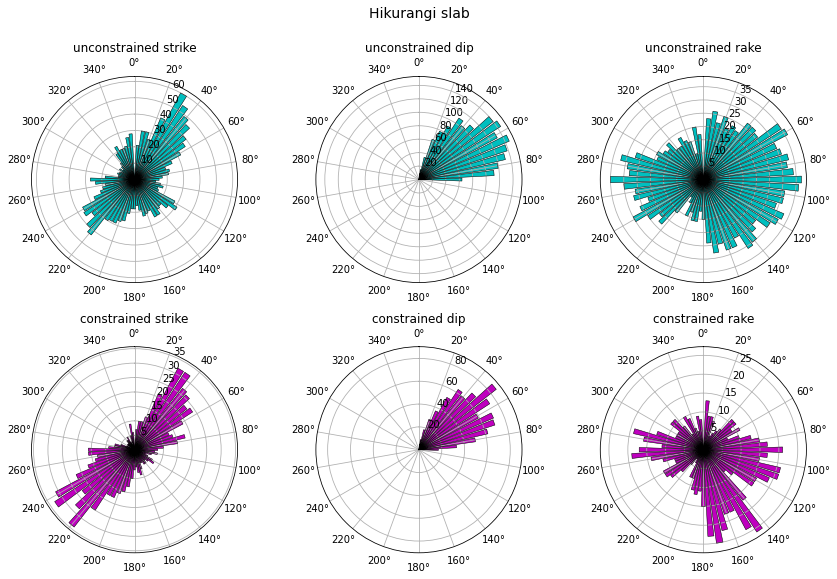

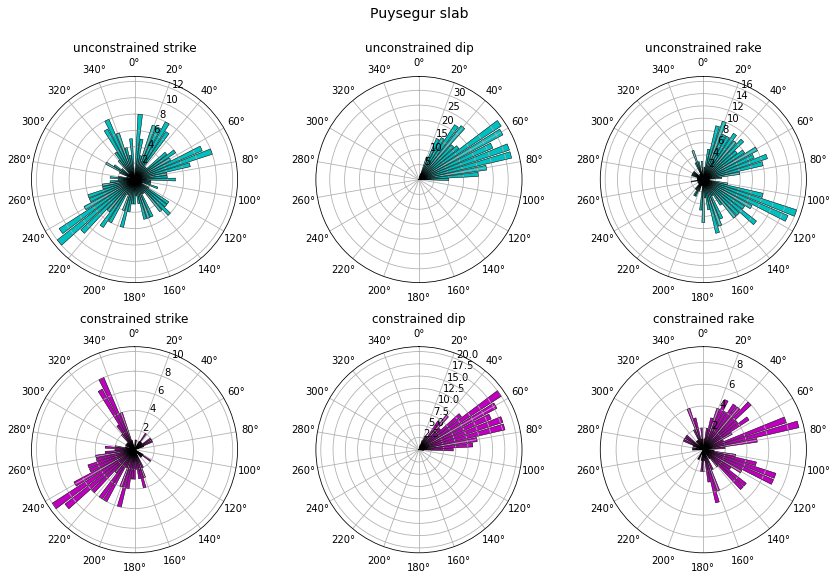

In [4]:
# let us see how the strike, dip & rakes looks like
dump_hik = slabrup.get_allstrikediprakes(slabevents, 'hik')
dump_puy = slabrup.get_allstrikediprakes(slabevents, 'puy')
xslabevents = {'hik': dump_hik, 'puy': dump_puy}
slabrup.review_strikediprake(xslabevents, procslabevents, 'hik')
plt.show()
slabrup.review_strikediprake(xslabevents, procslabevents, 'puy')

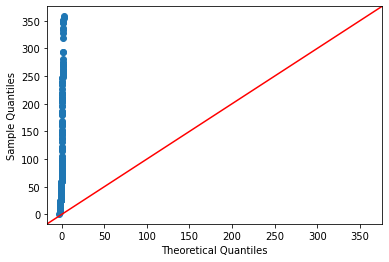

In [5]:
szone = 'hik'
dip = procslabevents[szone]['dip']
dep = procslabevents[szone]['dep']
strike = procslabevents[szone]['strike']

# check strike for dep bin
strike20=[]

for s,d in zip(strike, dep):
    if (d>=85) & (d<300):
        strike20.append(s)

sm.qqplot(np.array(strike20), line='45')
plt.show()

In [19]:
def cir_IQR(data, high=360, bounds=False):
    med, p25,p75 = np.median(data), np.percentile(data, 25), np.percentile(data, 75)
    cdat = []
    for d in data:
        if d>180:
            cdat.append(180-d)
        else:
            cdat.append(d)
    circ_med, circ_p25,circ_p75 = np.median(cdat), np.percentile(cdat, 25), np.percentile(cdat, 75)
    iqr_data = []
    for cd, d in zip(cdat, data):
        if (cd>= circ_p25) & (cd<=circ_p75):
            iqr_data.append(d)
    
    print('normal', med, p25,p75)
    print('circ', circ_med, circ_p25,circ_p75 )
    print('uncirc', 180-circ_med, 180-circ_p25,180-circ_p75)
    if med == (180-circ_med):
        return (med, p25, p75, iqr_data, cdat)
    else:
        return(circ_med, circ_p25,circ_p75, iqr_data, cdat)
    

normal 221.0 176.5 242.0
circ -41.0 -62.0 9.25
uncirc 221.0 242.0 170.75
normal 89.5 32.0 139.0
circ 32.0 18.25 103.0
uncirc 148.0 161.75 77.0


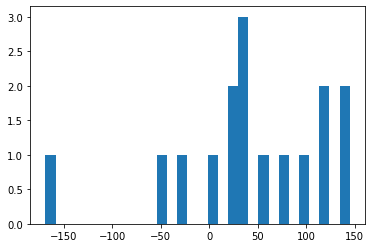

(220.49592296802956, 22.182443689196397)
(46.20209040012581, 26.347070756982795)
(left) median and IQR = 221.0 [176.5-242.0]
(right) median and IQR = 32.0 [18.2-103.0]


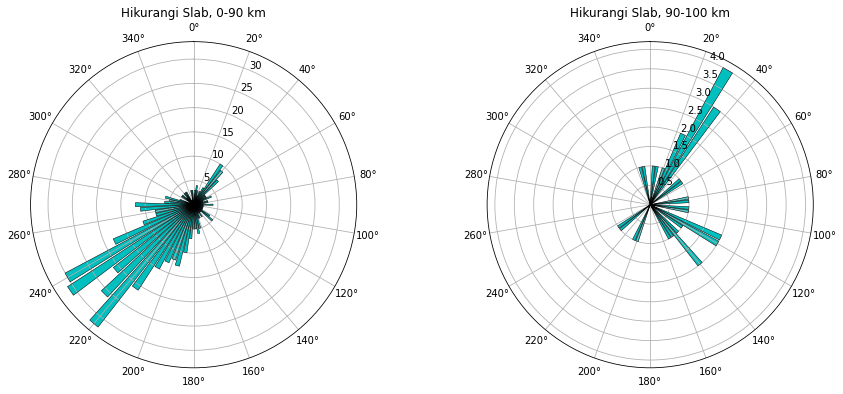

In [24]:
def get_strikediprake_depclass(szone, procslabevents):
    stitle = {'hik': 'Hikurangi Slab', 'puy': 'Puysegur slab'}
    
    if szone=='hik': 
        threshdep, max_dep = 90, 100
    else:
        threshdep, max_dep = 60, 180
    dep = procslabevents[szone]['dep']
    strike = procslabevents[szone]['strike']
    
    strike1, strike2 = [],[]
    for d, s in zip(dep, strike):
        if d<=threshdep:
            strike1.append(s)
        elif d<=max_dep:
            strike2.append(s)
    
    s1_med, s1_p25, s1_p75, s1_iqr, cdat1 = cir_IQR(strike1)
    
    s2_med, s2_p25, s2_p75, s2_iqr, cdat2 = cir_IQR(strike2)
   
    plt.hist(cdat2, 30)
    plt.show()
    
    
    
    print(circ.meanstats(s1_iqr, high=360, stdev=True))
    print(circ.meanstats(s2_iqr, high=360, stdev=True))

    fig = plt.figure(1, figsize=(15,6))
    ax1 = fig.add_subplot(121, projection='polar')
    ax2 = fig.add_subplot(122, projection='polar')
    slabrup.plot_hist(strike1, ax1, stitle = stitle[szone] + ', 0-%d km' %(threshdep), facecolor='c')
    slabrup.plot_hist(strike2, ax2, stitle = stitle[szone] + ', %d-%d km' %(threshdep, max_dep), facecolor='c')
    print('(left) median and IQR = %.1f [%.1f-%.1f]' %(s1_med, s1_p25, s1_p75))
    print('(right) median and IQR = %.1f [%.1f-%.1f]' %(s2_med, s2_p25, s2_p75))
    
get_strikediprake_depclass('hik', procslabevents)
    

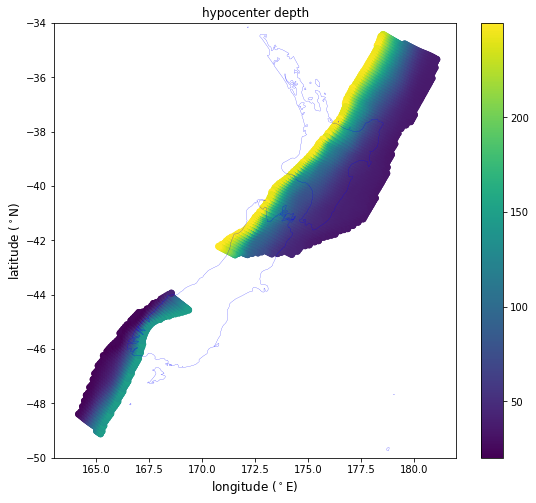

normal 192.0 153.75 228.5
circ -12.0 -48.5 61.5
uncirc 192.0 228.5 118.5
normal 249.0 230.0 278.0
circ -69.0 -98.0 -50.0
uncirc 249.0 278.0 230.0
(left) median and IQR = 192.0 [153.8-228.5]
(right) median and IQR = 249.0 [230.0-278.0]


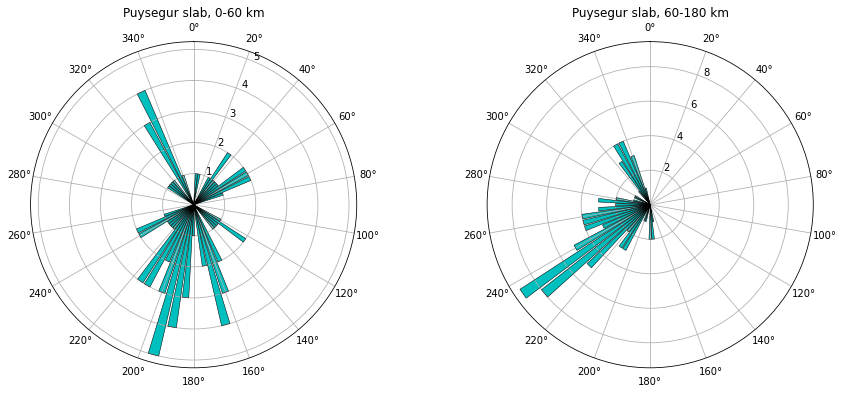

In [8]:
get_strikediprake_depclass('puy', procslabevents)

In [ ]:
def get_strikediprake_depclass(szone, procslabevents):
    stitle = {'hik': 'Hikurangi Slab', 'puy': 'Puysegur slab'}
    
    if szone=='hik': 
        threshdep, max_dep = 85, 300
    else:
        threshdep, max_dep = 60, 180
    dep = procslabevents[szone]['dep']
    strike = procslabevents[szone]['strike']
    
    strike1, strike2 = [],[]
    for d, s in zip(dep, strike):
        if d<=threshdep:
            strike1.append(s)
        elif d<=max_dep:
            strike2.append(s)
    
    kstrike1, kstrike2 = [],[]
    for s in strike1:
        if s<180:
            kstrike1.append(s)
        else:
            kstrike1.append(180-s)
        
    print('IQR1==', np.median(strike1), np.percentile(strike1, 75), np.percentile(strike1, 25))
    print('IQR11==', np.median(kstrike1), np.percentile(kstrike1, 75), np.percentile(kstrike1, 25))
    
    for s in strike2:
        if s<180:
            kstrike2.append(s)
        else:
            kstrike2.append(180-s)
    print('IQR2==', np.median(strike2), np.percentile(strike2, 75), np.percentile(strike2, 25))
    print('IQR22==', np.median(kstrike2), np.percentile(kstrike2, 75), np.percentile(kstrike2, 25))
        
    cmean, cstd = circ.meanstats(strike1, high=360, stdev=True)
    ss = []
    for s in strike1:
        if (s<=cmean+45) & (s>=cmean-45):
            ss.append(s)
    cmean, cstd = circ.meanstats(ss, high=360, stdev=True)
    strikes.update({threshdep: [cmean, cstd]})
    print(cmean, cmean-cstd, cmean+cstd)
        
    cmean, cstd = circ.meanstats(strike2, high=360, stdev=True)
    
    # strikes.update({max_dep: [cmean, cstd]})
        
    return strikes
    

In [ ]:
strikes = get_strikediprake_depclass('hik', procslabevents)
print(strikes)


In [ ]:
180+63.25

In [ ]:
def evalute_strikediprake_depbin(szone, xslabevents):
    stitle = {'hik': 'Hikurangi Slab', 'puy': 'Puysegur slab'}
    
    
    if szone=='hik': 
        fbs, min_x,max_x  =10, 20, 300
    else:
        fbs, min_x,max_x  =10, 20, 200
    
    if szone=='hik':
        fig = plt.figure(1, figsize=(13,8))
    else:
        fig = plt.figure(1, figsize=(10,8))
    plt.rcParams.update({'font.size': 13})
    ax1 = fig.add_subplot(311)
    xbox_strike = binned_strikes(xslabevents[szone]['dep'], 
                        xslabevents[szone]['strike'], fbs =fbs, min_x = min_x, max_x = max_x,
                        strtitle='', ylabel='strike (deg)', ax =ax1);
   
    
    
    ax2 = fig.add_subplot(312)
    xbox_dip = slabrup.binned_boxes(xslabevents[szone]['dep'], 
                        xslabevents[szone]['dip'], fbs =fbs, min_x = min_x, max_x = max_x,
                        strtitle='', ylabel='dip (deg)', ax =ax2);
    ax3 = fig.add_subplot(313)
    slabrup.binned_boxes(xslabevents[szone]['dep'], 
                        xslabevents[szone]['rake'], fbs =fbs, min_x = min_x, max_x = max_x,
                         strtitle='', ylabel='rake (deg)', ax=ax3);
    
    if szone=='hik':
        ax1.set_xlim([0.5, 24.5])
        ax2.set_xlim([0.5, 24.5])
        ax3.set_xlim([0.5, 24.5])
    else:
        ax1.set_xlim([0.5, 15.5])
    
    fig.suptitle(stitle[szone], fontsize=12, y=0.97) 
    
  #  fbs, min_x,max_x  =10, 20, 300
    x_bin = [d for d in range(min_x, max_x, fbs)]
    
    X, Y, Ystd = [], [],[] 
    for db in xbox_strike.keys():
        ky = xbox_strike[db]
        if len(ky)<5:
            continue
        cmean, cstd = circ.meanstats(ky, high=360, stdev=True)
        Y.append(cmean)
        Ystd.append(cstd)
        X.append(db)
    if szone =='puy':
        Y.append(cmean)
        Ystd.append(cstd)
        X.append(290)
    X = np.array(X)
    
    strike_interp = interp1d(X, np.array(Y))
    strikestd_interp = interp1d(X, np.array(Ystd))
    
    bstrikes = []
    kstrikes = {}
    for db in x_bin:
        bstrikes.append([db, round(strike_interp(db).tolist()), round(strikestd_interp(db).tolist())])
        kstrikes.update({db:[round(strike_interp(db).tolist()), round(strikestd_interp(db).tolist())]})
    tS = np.array(bstrikes)
    ax1.errorbar([x  for x in range(1,len(x_bin)+1)], tS[:,1], ls= '--',
                 yerr = tS[:,2], color='g', linewidth=0.2, capsize=5)
    X, Y1 = [], []
    
    for db in xbox_dip.keys():
        ky = xbox_dip[db]
        if len(ky)<5:
            continue
        mean_dip = np.median(ky)
        
        if szone=='hik':
            if ((db>=60) & (db<=100)) & (mean_dip<70):
                print(db)
                mean_dip =70
                
        Y1.append(mean_dip)
        X.append(db)
    if szone =='puy':
        Y1.append(60)
        X.append(60)
        Y1.append(mean_dip)
        X.append(290)
        
    X = np.array(X)
    dip_interp = interp1d(X, np.array(Y1))
    bdips = []
    kdips = {}
    for db in x_bin:
        bdips.append([db, dip_interp(db).tolist()])
        kdips.update({db: dip_interp(db).tolist()})
    tS = np.array(bdips)
    ax2.plot([x  for x in range(1,len(x_bin)+1)], tS[:,1], '--', color='g', linewidth=0.5)
    
    #szone: {dep: [[s1, d1, r1, p1], [s2, d2, r2, p2], .... ]}
    
    dep_sdrp ={}
    for db in x_bin:
        sdrp = []
        s2, stdstk =kstrikes[db]
        fdip = kdips[db]
        s1 = s2-stdstk
        if s1<0:
            s1=360+s1
        sdrp.append([s1, fdip, -90, 0.32])
        sdrp.append([s2, fdip, -90, 0.36])
        s3 = s2+stdstk
        if s3>360:
            s3=s3-360
        sdrp.append([s3, fdip, -90, 0.32])
        dep_sdrp.update({db:sdrp})
    #slabrupgeom = {szone: dep_sdrp}
    fig.tight_layout()
    return dep_sdrp
    

In [ ]:
slabrupgeom_hik = evalute_strikediprake_depbin('hik', procslabevents);

In [ ]:
slabrupgeom_puy = evalute_strikediprake_depbin('puy', procslabevents);

In [ ]:
print(procslabevents['hik'].keys())

strike = procslabevents['hik']['strike']
dep = procslabevents['hik']['dep']

plt.plot(strike, dep,'o')


In [ ]:
procslabevents

# another round of simplification
strike1, strike2, strike3 = [],[],[]
for dep in slabrupgeom_hik.keys():
    sdrp = slabrupgeom_hik[dep]
    strike1.append(sdrp[0][0])
    strike2.append(sdrp[1][0])
    strike3.append(sdrp[2][0])
    
strikes_dep_upper85km = []
strikes_dep_below85km = []

print(slabrupgeom_hik.keys())